# Problem Statement :
- **To predict and understand the applicant's profile to minimize the risk of future loan defaults**

### Importing Libraries :

In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor

from IPython.display import display
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import warnings
warnings.filterwarnings("ignore")

### Load Data  :

In [8]:
df = pd.read_csv("Loan_Defaulters.csv")

In [9]:
df.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,loan_status
0,11454641,A,100000,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


# EDA :

In [11]:
df.columns                                                                           

Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
       'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'loan_status'],
      dtype='object')

In [12]:
df.shape

(20000, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  int64  
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  loan_status            20000 non-null  int64  
dtypes:

In [14]:
df.dtypes.value_counts()

int64      6
float64    5
object     4
dtype: int64

In [16]:
df.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,loan_status
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


In [17]:
df.replace({"?":np.nan},inplace=True)

In [18]:
df.isna().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
loan_status                  0
dtype: int64

In [19]:
df.isna().mean()*100

id                        0.000
grade                     0.000
annual_inc                0.000
short_emp                 0.000
emp_length_num            0.000
home_ownership            7.455
dti                       0.770
purpose                   0.000
term                      0.000
last_delinq_none          0.000
last_major_derog_none    97.130
revol_util                0.000
total_rec_late_fee        0.000
od_ratio                  0.000
loan_status               0.000
dtype: float64

In [20]:
df.corr() 

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,loan_status
id,1.000000,0.017971,0.015413,0.003863,0.006407,-0.034091,-0.051439,-0.006106,-0.014203,0.000465,-0.037307
annual_inc,0.017971,1.000000,-0.099317,0.118024,-0.230219,-0.080378,0.023281,0.016951,0.014713,-0.004953,-0.092402
short_emp,0.015413,-0.099317,1.000000,-0.582580,0.002013,0.030880,0.072290,-0.011014,0.010424,-0.005309,0.037186
emp_length_num,0.003863,0.118024,-0.582580,1.000000,0.009369,-0.053371,-0.158177,0.027390,-0.012382,0.004446,-0.041420
dti,0.006407,-0.230219,0.002013,0.009369,1.000000,0.030379,0.004079,0.098673,0.011072,0.005571,0.141884
last_delinq_none,-0.034091,-0.080378,0.030880,-0.053371,0.030379,1.000000,0.603267,0.013373,-0.011000,-0.001996,0.021494
last_major_derog_none,-0.051439,0.023281,0.072290,-0.158177,0.004079,0.603267,1.000000,-0.027597,-0.086395,0.050211,-0.013770
revol_util,-0.006106,0.016951,-0.011014,0.027390,0.098673,0.013373,-0.027597,1.000000,0.008435,-0.008228,0.053682
total_rec_late_fee,-0.014203,0.014713,0.010424,-0.012382,0.011072,-0.011000,-0.086395,0.008435,1.000000,-0.002354,0.130233
od_ratio,0.000465,-0.004953,-0.005309,0.004446,0.005571,-0.001996,0.050211,-0.008228,-0.002354,1.000000,0.000403


<Axes: >

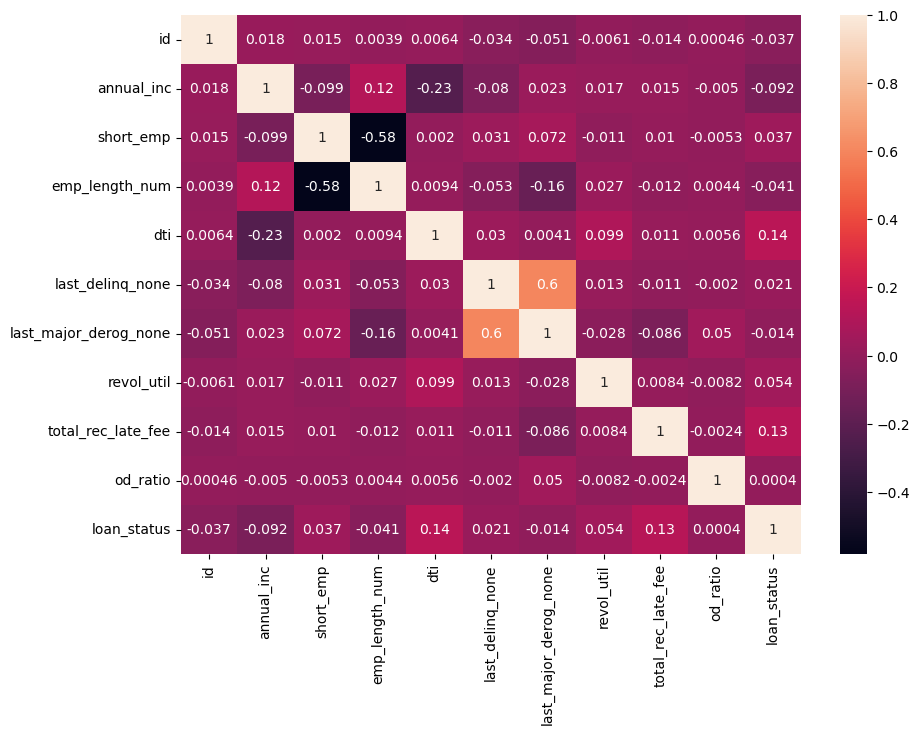

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [ ]:
### correlation of target column with other features


features          :     id     annual_inc   short_emp    emp_length_num   dti    last_delinq_none   last_major_derog_none 
    
(loan_status) corr   :   -0.037    -0.092         0.037       -0.041         0.14        0.021            -0.014 
              
        
        
                      revol_util      total_rec_late_fee         od_ratio
                         0.054            0.13                    0.0004 

<Axes: >

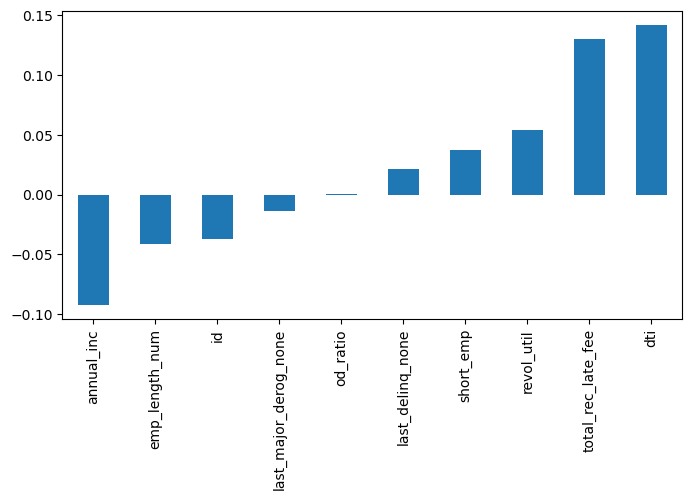

In [25]:
plt.figure(figsize=(8,4))
df.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")

<Axes: xlabel='loan_status', ylabel='count'>

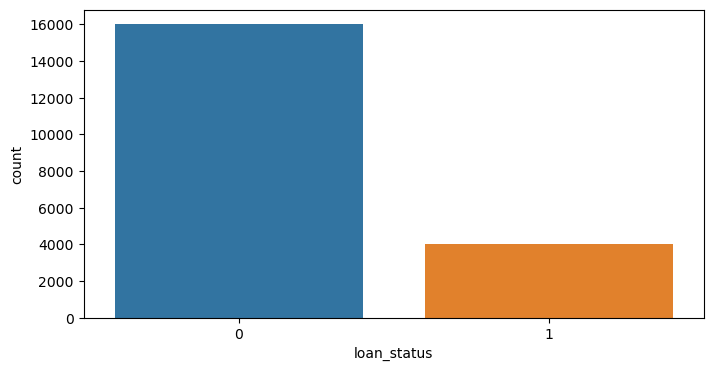

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(x="loan_status",data=df)

<AxesSubplot:xlabel='grade', ylabel='count'>

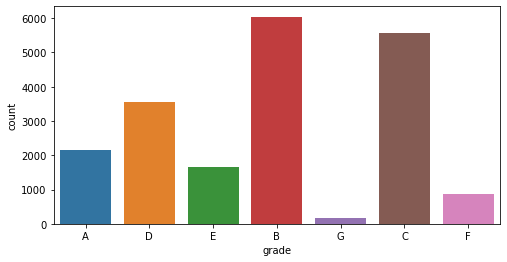

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x="grade",data=df)

<AxesSubplot:xlabel='grade', ylabel='count'>

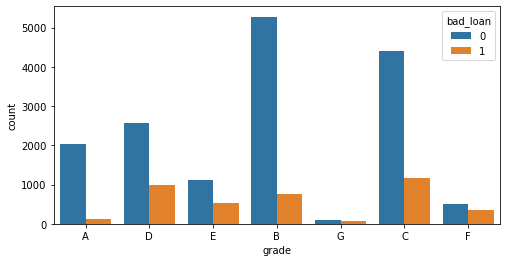

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(x="grade",hue="bad_loan",data=df)

In [24]:
pd.crosstab(df["grade"],df["bad_loan"])

bad_loan,0,1
grade,,
A,2035,124
B,5275,767
C,4394,1172
D,2575,979
E,1103,542
F,514,351
G,104,65


<AxesSubplot:xlabel='short_emp', ylabel='count'>

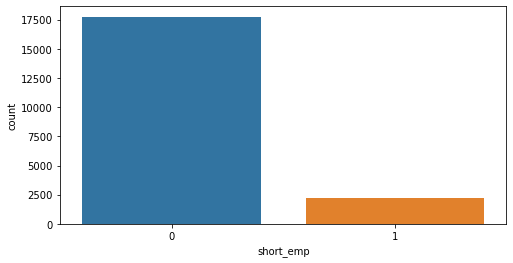

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x="short_emp",data=df)

<AxesSubplot:xlabel='short_emp', ylabel='count'>

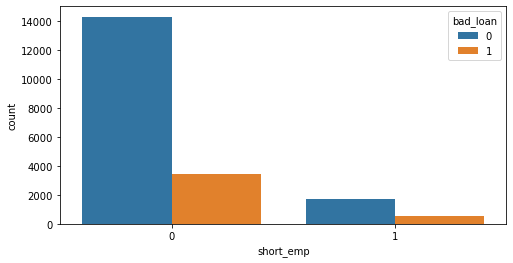

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(x="short_emp",hue="bad_loan",data=df)

<AxesSubplot:xlabel='emp_length_num', ylabel='count'>

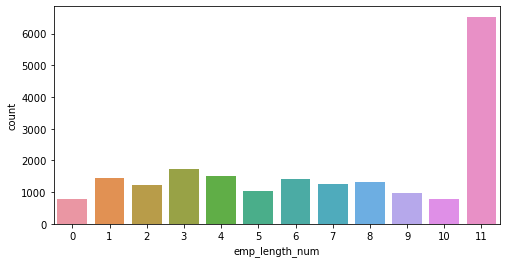

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(x="emp_length_num",data=df)

<AxesSubplot:xlabel='emp_length_num', ylabel='count'>

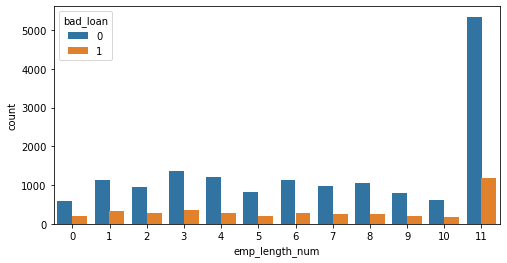

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(x="emp_length_num",hue="bad_loan",data=df)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

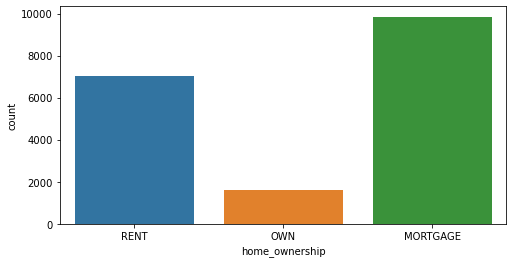

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(x="home_ownership",data=df)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

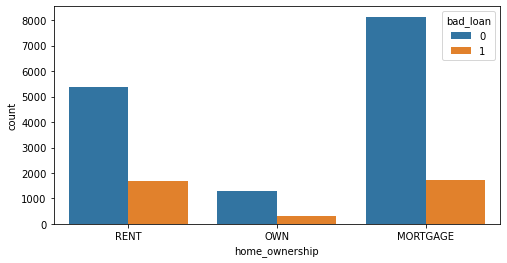

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(x="home_ownership",hue="bad_loan",data=df)

In [31]:
pd.crosstab(df["home_ownership"],df["bad_loan"])

bad_loan,0,1
home_ownership,,
MORTGAGE,8136,1708
OWN,1297,316
RENT,5368,1684


<AxesSubplot:xlabel='term', ylabel='count'>

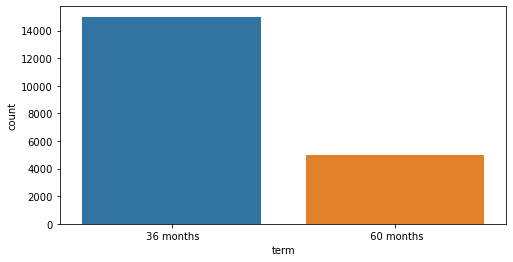

In [32]:
plt.figure(figsize=(8,4))
sns.countplot(x="term",data=df)

<AxesSubplot:xlabel='term', ylabel='count'>

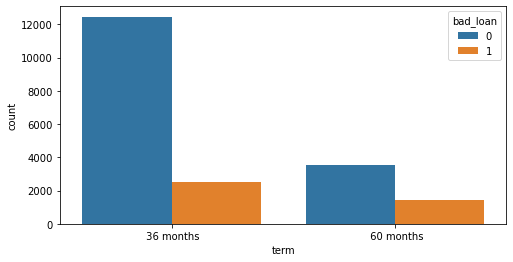

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(x="term",hue="bad_loan",data=df)

<AxesSubplot:xlabel='last_delinq_none', ylabel='count'>

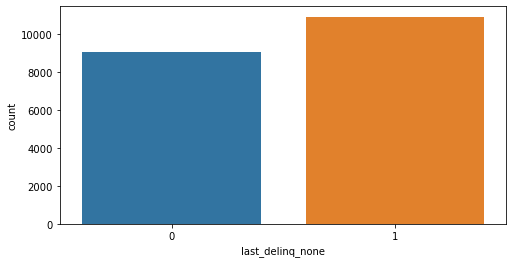

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(x="last_delinq_none",data=df)

<AxesSubplot:xlabel='last_delinq_none', ylabel='count'>

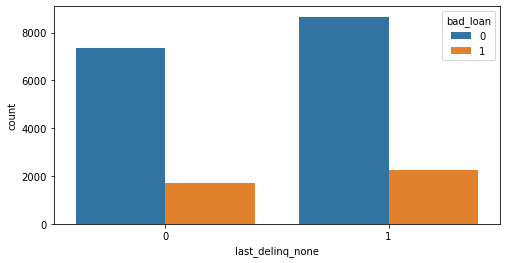

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(x="last_delinq_none",hue="bad_loan",data=df)

<AxesSubplot:xlabel='last_major_derog_none', ylabel='count'>

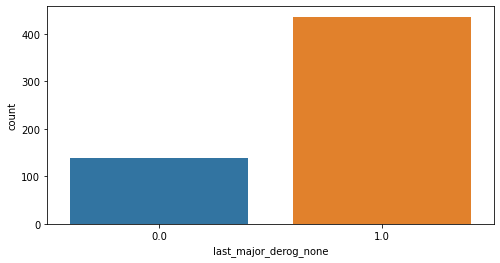

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(x="last_major_derog_none",data=df)

<AxesSubplot:xlabel='last_major_derog_none', ylabel='count'>

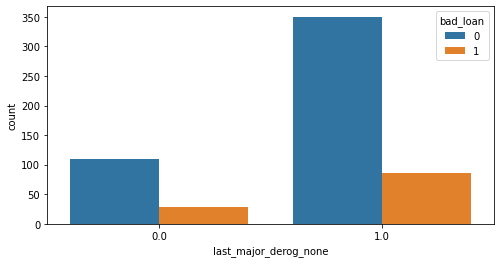

In [37]:
plt.figure(figsize=(8,4))
sns.countplot(x="last_major_derog_none",hue="bad_loan",data=df)

<AxesSubplot:xlabel='purpose', ylabel='count'>

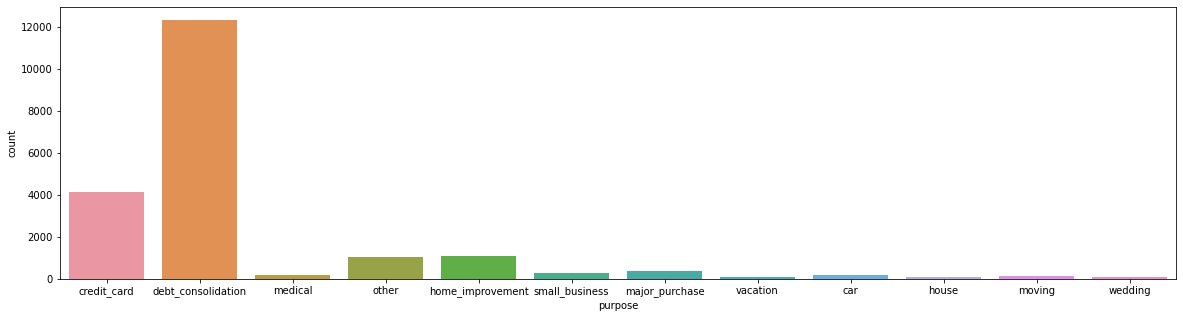

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(x="purpose",data=df)

<AxesSubplot:xlabel='purpose', ylabel='count'>

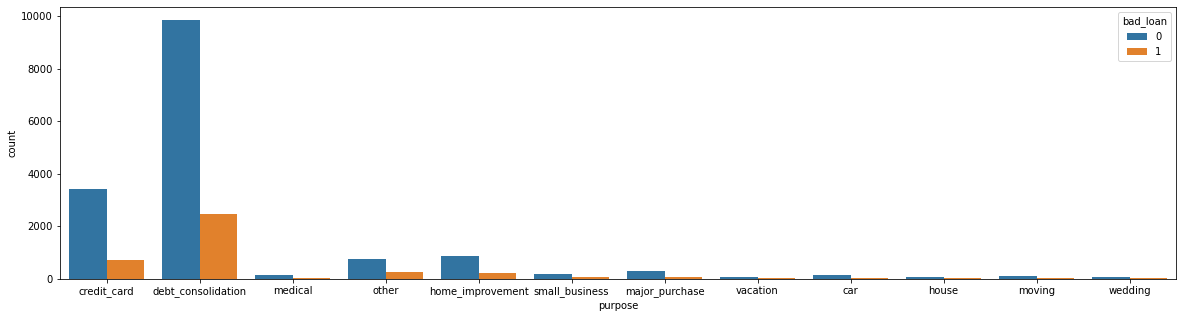

In [39]:
plt.figure(figsize=(20,5))
sns.countplot(x="purpose",hue="bad_loan",data=df)

In [40]:
pd.crosstab(df["purpose"],df["bad_loan"])

bad_loan,0,1
purpose,,
car,138,30
credit_card,3435,702
debt_consolidation,9855,2482
home_improvement,887,209
house,86,15
major_purchase,293,86
medical,136,39
moving,93,30
other,747,274


<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

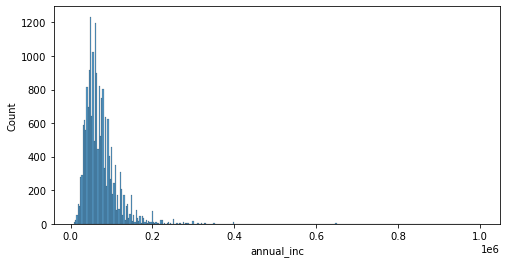

In [41]:
plt.figure(figsize=(8,4))
sns.histplot(df["annual_inc"])                                               ## histogram for continuous data

<AxesSubplot:xlabel='dti', ylabel='Count'>

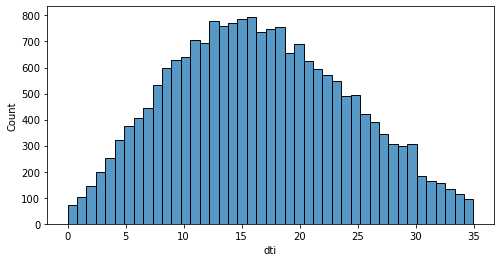

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(df["dti"])

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

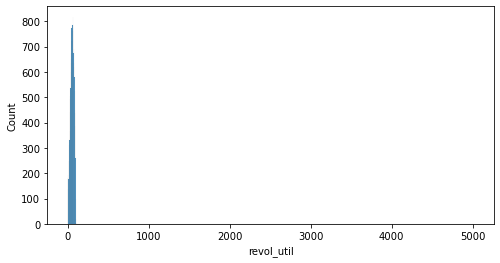

In [43]:
plt.figure(figsize=(8,4))
sns.histplot(df["revol_util"])

<AxesSubplot:xlabel='od_ratio', ylabel='Count'>

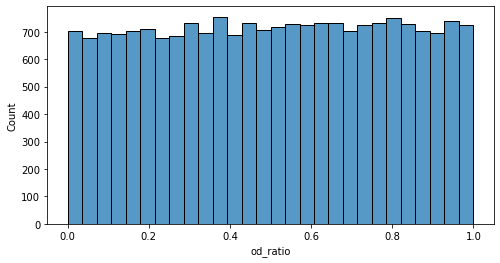

In [44]:
plt.figure(figsize=(8,4))
sns.histplot(df["od_ratio"])

In [45]:
df.groupby("home_ownership").agg(annual_inc_max =("annual_inc","max"),
                     annual_inc_min=("annual_inc","min"),
                     dti_max=("dti","max"),
                     dti_min=("dti","min")).reset_index()

,home_ownership,annual_inc_max,annual_inc_min,dti_max,dti_min
0,MORTGAGE,1000000,12250,34.99,0.00
1,OWN,940000,10000,34.95,0.23
2,RENT,1000000,8412,34.96,0.00


In [46]:
df.groupby("grade").agg(annual_inc_max =("annual_inc","max"),
                     annual_inc_min=("annual_inc","min"),
                     dti_max=("dti","max"),
                     dti_min=("dti","min")).reset_index()

,grade,annual_inc_max,annual_inc_min,dti_max,dti_min
0,A,750000,14388,34.98,0.0
1,B,1000000,10000,34.81,0.0
2,C,932000,8688,34.99,0.0
3,D,550000,8412,34.97,0.0
4,E,850000,12888,34.99,0.0
5,F,650000,12250,34.57,0.0
6,G,550000,17500,34.82,0.0


<AxesSubplot:xlabel='annual_inc', ylabel='od_ratio'>

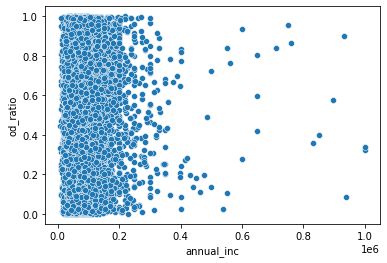

In [47]:
sns.scatterplot(x="annual_inc",y="od_ratio",data=df)

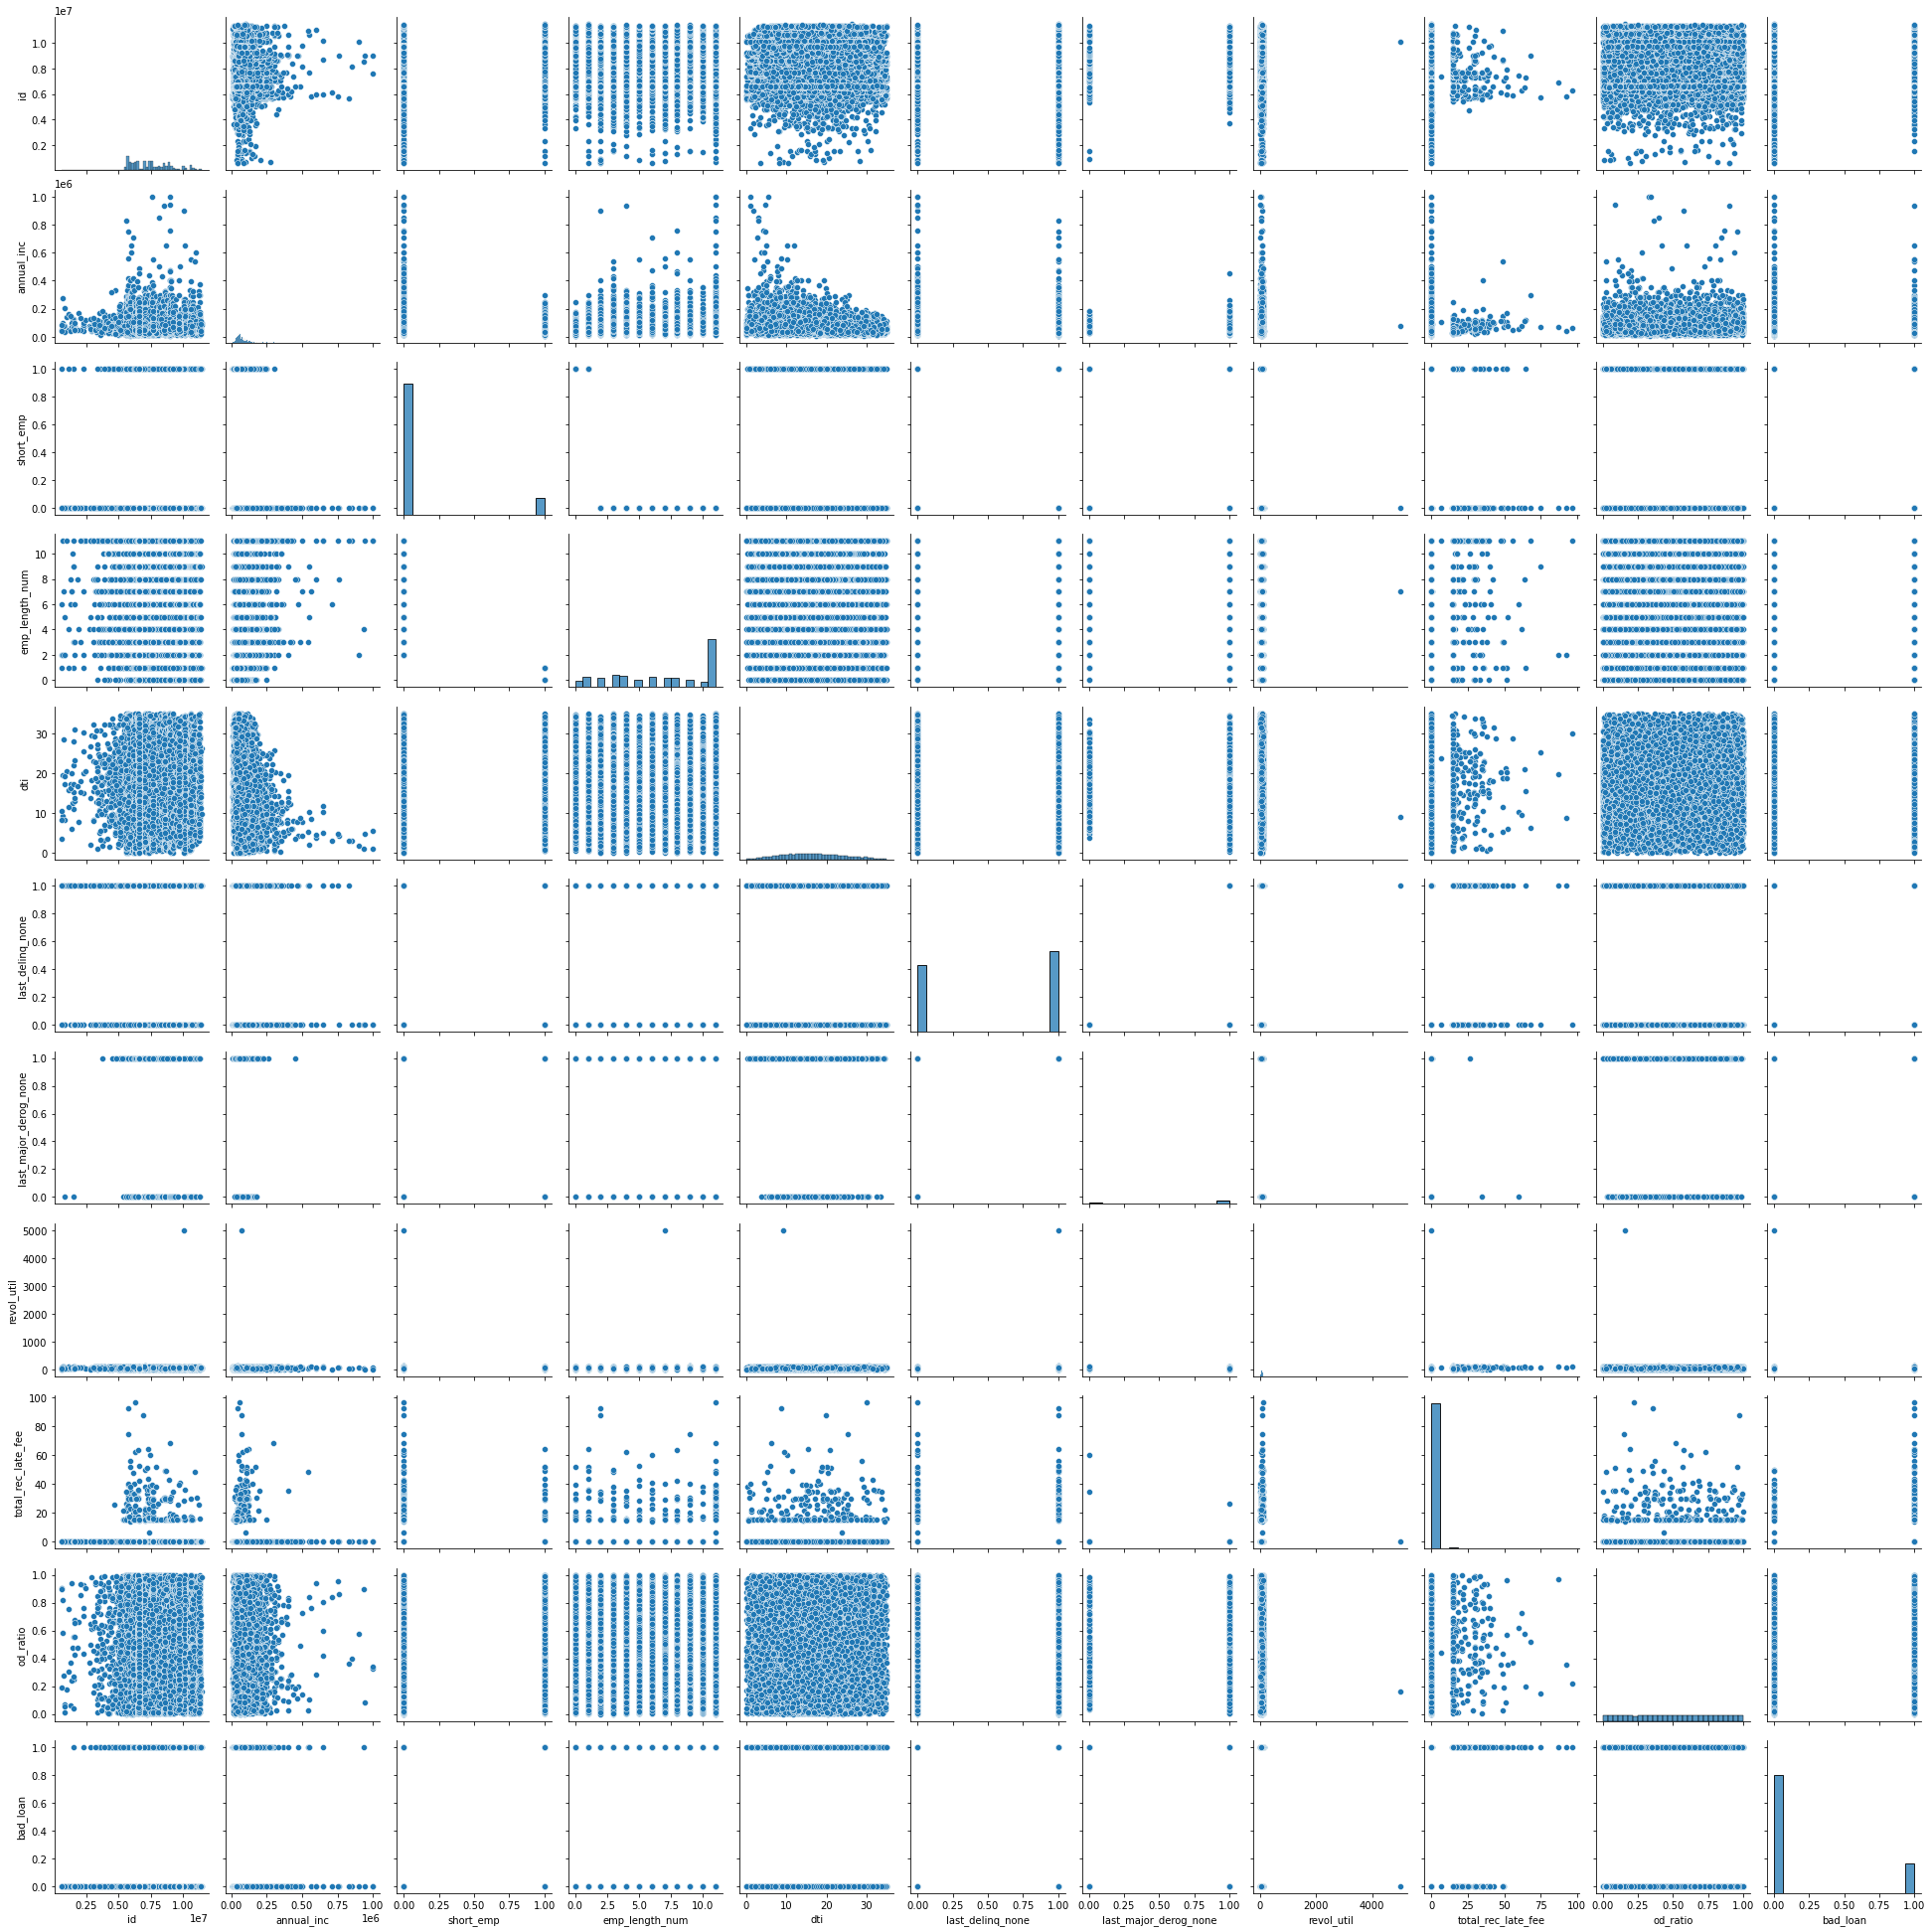

In [48]:
sns.pairplot(df)